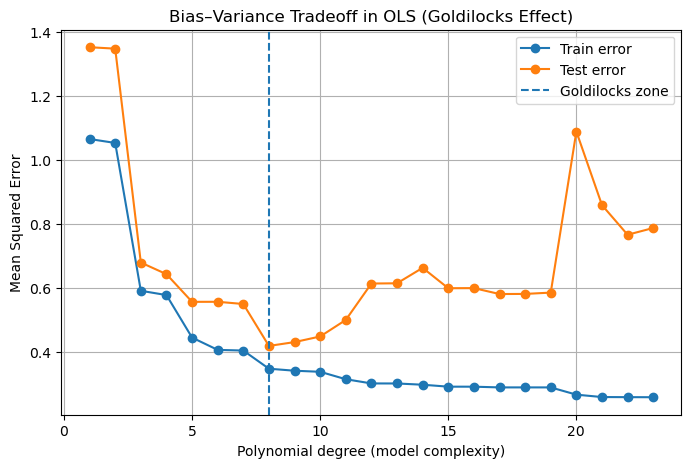

In [ ]:
# OLS Bias–Variance Goldilocks Demo + per-degree fit visuals
# This extends your working snippet by adding a Goldilocks plot (train/test MSE vs degree)
# while keeping the multiple fitted-curve figures.
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# --- Data (same setup you used) ---
np.random.seed(1111)
n = 100
X = np.random.uniform(-3, 3, size=(n, 1))
y_true = np.sin(1.5 * X) + 0.5 * np.cos(3 * X)
y = y_true + np.random.normal(0, 0.6, size=y_true.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# --- 1) Goldilocks plot: train/test MSE vs degree ---
# Evaluate a broader range of model complexities
max_degree_eval = min(23, n // 2)  # cap to avoid degenerate very-high fits
degrees_eval = list(range(1, max_degree_eval + 1))

train_err, test_err = [], []
for d in degrees_eval:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    Xtr_poly = poly.fit_transform(X_train)
    Xte_poly = poly.transform(X_test)
    model = LinearRegression().fit(Xtr_poly, y_train.ravel())
    ytr_pred = model.predict(Xtr_poly)
    yte_pred = model.predict(Xte_poly)
    train_err.append(mean_squared_error(y_train, ytr_pred))
    test_err.append(mean_squared_error(y_test, yte_pred))

best_deg = degrees_eval[int(np.argmin(test_err))]

plt.figure(figsize=(8, 5))
plt.plot(degrees_eval, train_err, marker='o', label="Train error")
plt.plot(degrees_eval, test_err, marker='o', label="Test error")
plt.axvline(best_deg, linestyle='--', label="Goldilocks zone")
plt.xlabel("Polynomial degree (model complexity)")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff in OLS (Goldilocks Effect)")
plt.legend()
plt.grid(True)
plt.show()


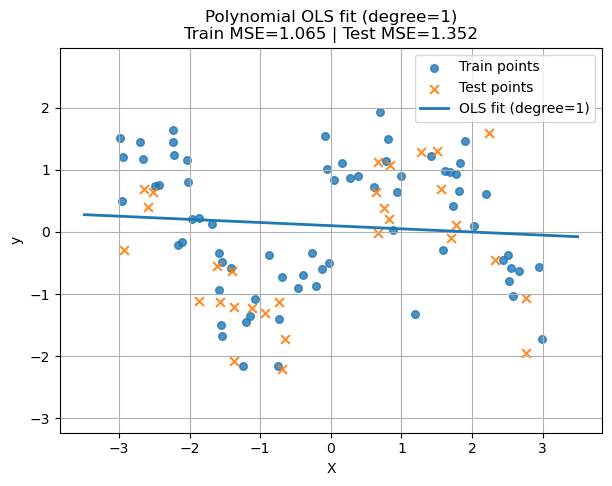

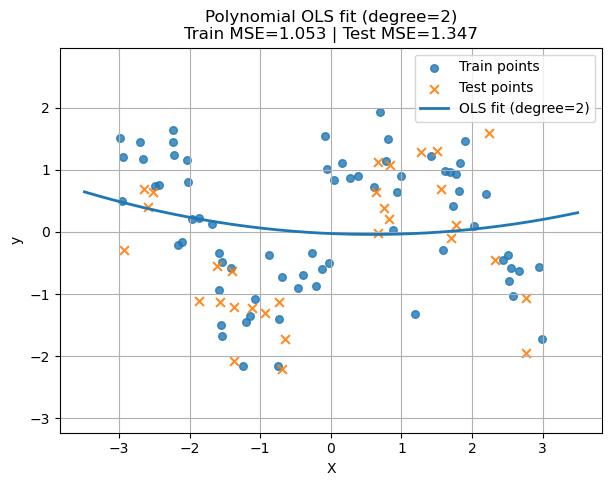

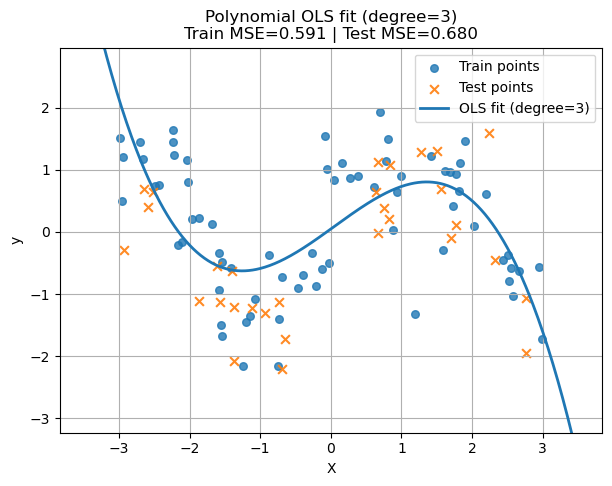

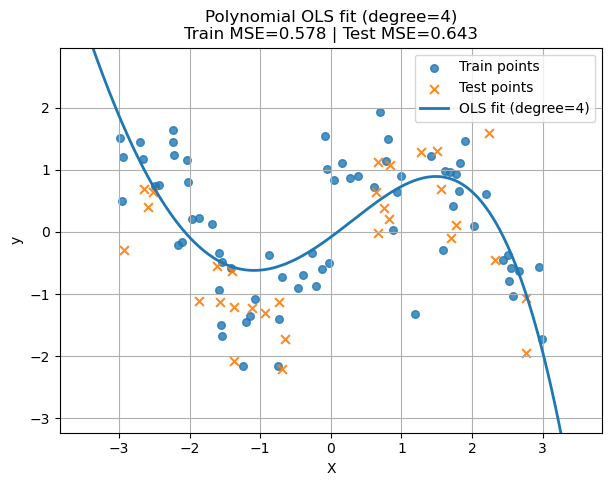

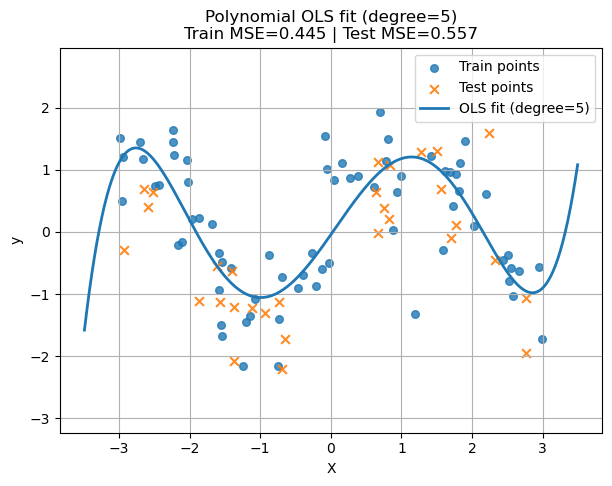

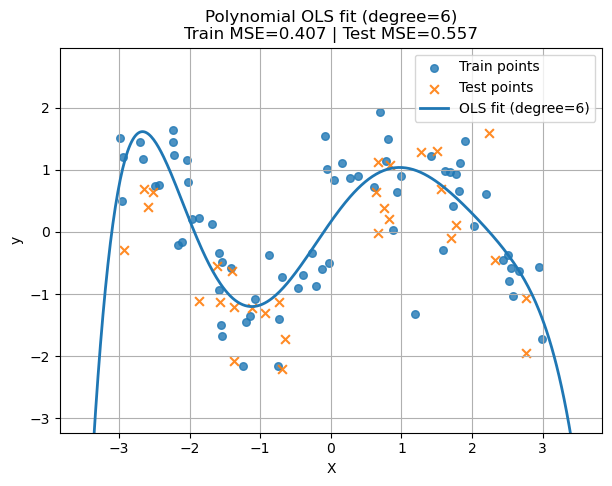

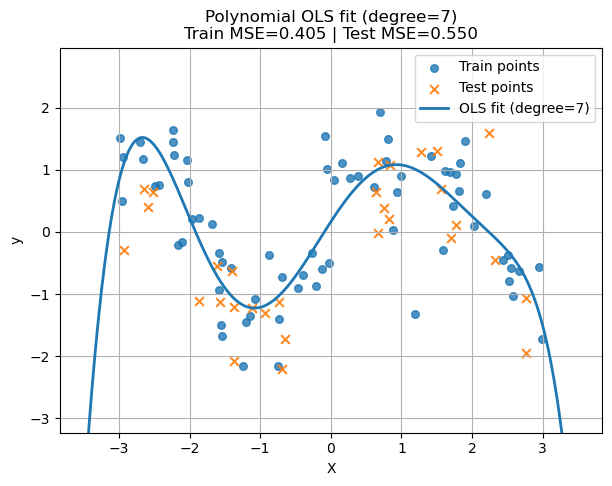

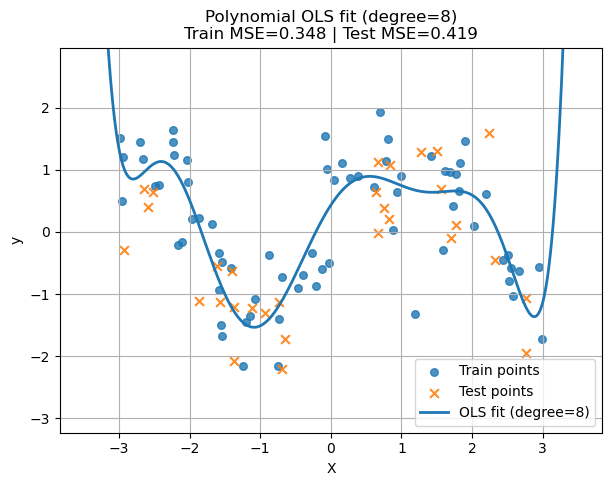

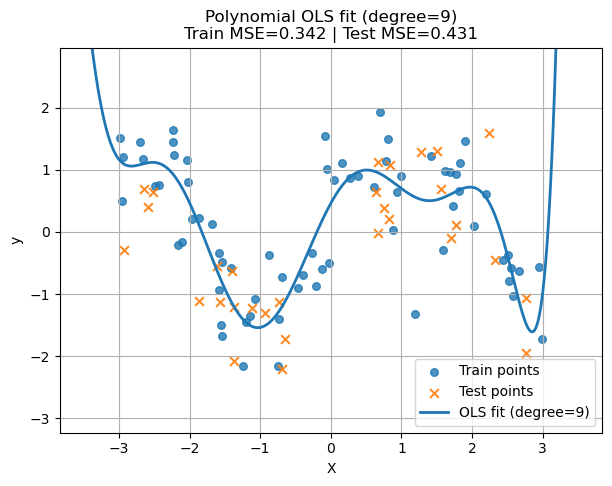

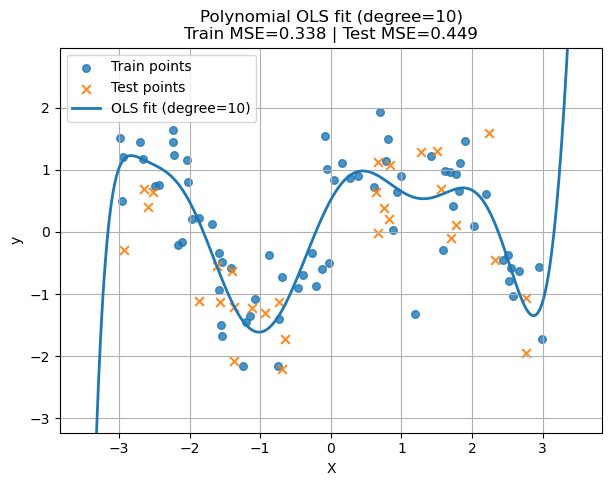

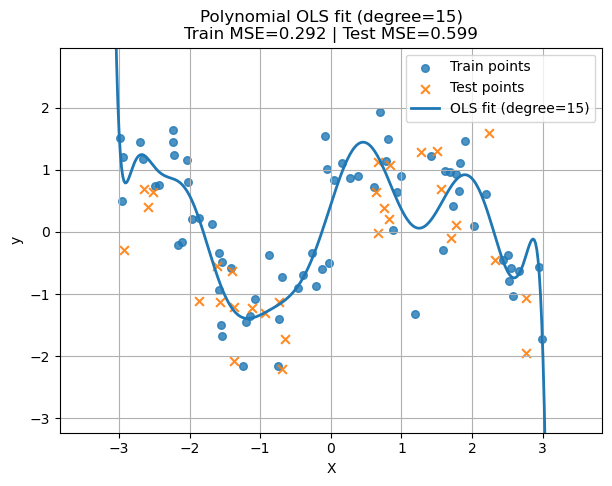

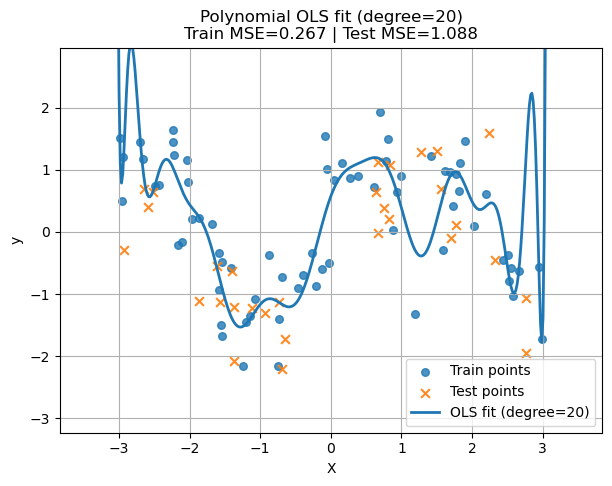

In [ ]:

# --- 2) Visualize OLS polynomial fits at multiple complexities ---
# Degrees to show - log space up to n/2
degrees_to_show = np.logspace(0, np.log10(n/2), num=8, dtype=int)
degrees_to_show = np.unique(degrees_to_show)  # Remove duplicates
degrees_to_show =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]  # Remove duplicates

# Prediction grid for smooth curves
x_min, x_max = X.min() - 0.5, X.max() + 0.5
x_plot = np.linspace(x_min, x_max, 400).reshape(-1, 1)

for d in degrees_to_show:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    Xtr_poly = poly.fit_transform(X_train)
    Xpl_poly = poly.transform(x_plot)
    model = LinearRegression().fit(Xtr_poly, y_train.ravel())
    y_plot = model.predict(Xpl_poly)
    
    # Compute train/test MSE for the title
    ytr_pred = model.predict(Xtr_poly)
    yte_pred = model.predict(poly.transform(X_test))
    tr_mse = mean_squared_error(y_train, ytr_pred)
    te_mse = mean_squared_error(y_test, yte_pred)

    # Dynamic y-limits centered on data (prevents extreme blow-ups from dominating)
    y_data_min = min(y_train.min(), y_test.min())
    y_data_max = max(y_train.max(), y_test.max())
    y_range = y_data_max - y_data_min
    y_center = (y_data_max + y_data_min) / 2
    y_half_range = y_range * 0.75  # show 150% of the data's range
    y_min = y_center - y_half_range
    y_max = y_center + y_half_range

    plt.figure(figsize=(7,5))
    plt.scatter(X_train, y_train, s=30, alpha=0.8, label="Train points")
    plt.scatter(X_test, y_test, s=40, alpha=0.9, marker='x', label="Test points")
    plt.plot(x_plot, y_plot, linewidth=2, label=f"OLS fit (degree={d})")
    plt.title(f"Polynomial OLS fit (degree={d})\nTrain MSE={tr_mse:.3f} | Test MSE={te_mse:.3f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.grid(True)
    plt.show()